# Plot with Cufflinks

to config Jupyter Lab 

``` shell
apt install npm

pip install nodejs cufflinks

# JupyterLab renderer support
jupyter labextension install jupyterlab-plotly@4.14.3

# OPTIONAL: Jupyter widgets extension
jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
```

to set offline
``` Python
import cufflinks as cf

cf.set_config_file(offline=True, world_readable=True)
```

In [6]:
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=True)
print(cf.__version__)

import plotly.offline as plyo 
plyo.init_notebook_mode(connected=True)  

0.17.3


In [2]:
import pandas as pd
import os

df = pd.read_hdf(os.path.join('..', 'data', 'HK.00700'))
df.index = df['date']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2649 entries, 2010-07-19 to 2021-04-20
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2649 non-null   datetime64[ns]
 1   code      2649 non-null   object        
 2   open      2649 non-null   float64       
 3   high      2649 non-null   float64       
 4   low       2649 non-null   float64       
 5   close     2649 non-null   float64       
 6   preclose  2649 non-null   float64       
 7   volume    2649 non-null   int64         
 8   amount    2649 non-null   float64       
 9   pctChg    2649 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 227.6+ KB


In [3]:
df.tail()

,date,code,open,high,low,close,preclose,volume,amount,pctChg
date,,,,,,,,,,
2021-04-14,2021-04-14,HK.00700,621.0,625.0,615.5,623.5,608.0,17999746,1.117871e+10,0.402576
2021-04-15,2021-04-15,HK.00700,623.5,623.5,610.5,620.0,623.5,14548616,8.953514e+09,-0.561347
2021-04-16,2021-04-16,HK.00700,620.0,632.5,616.0,632.0,620.0,20757051,1.299132e+10,1.935484
2021-04-19,2021-04-19,HK.00700,630.0,644.0,620.0,627.0,632.0,20241398,1.278897e+10,-0.476190
2021-04-20,2021-04-20,HK.00700,620.0,626.0,618.0,622.5,627.0,15227980,9.461631e+09,0.403226


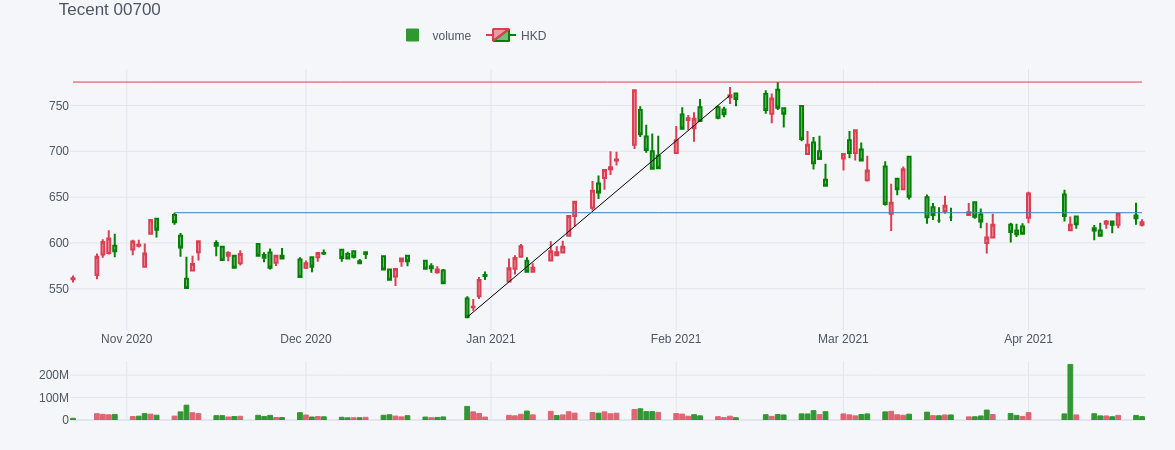

In [46]:
qf = cf.QuantFig(
    df[-120:],
    title='Tecent 00700',
    legend='top',
    name='HKD'
)
qf.add_trendline('2020-12-28','2021-02-10',on='close',
#                  text='trendline',textangle=0
                 color='black')
qf.add_support('2020-11-9',on='high',mode='toend',
#                text='support', 
               color='blue')

qf.add_resistance('2021-02-18',on='high', 
#                   mode='fromstart',
#                   text='resistance',textangle=30
                  color='red')
qf.add_volume()
layout = dict(
    xaxis=dict(
        categoryorder="category ascending", # ommit non-tradding day
        type='category'
    )
)
qf.iplot(asFigure=True, up_color='red',down_color='green', 
#          layout=layout
        )

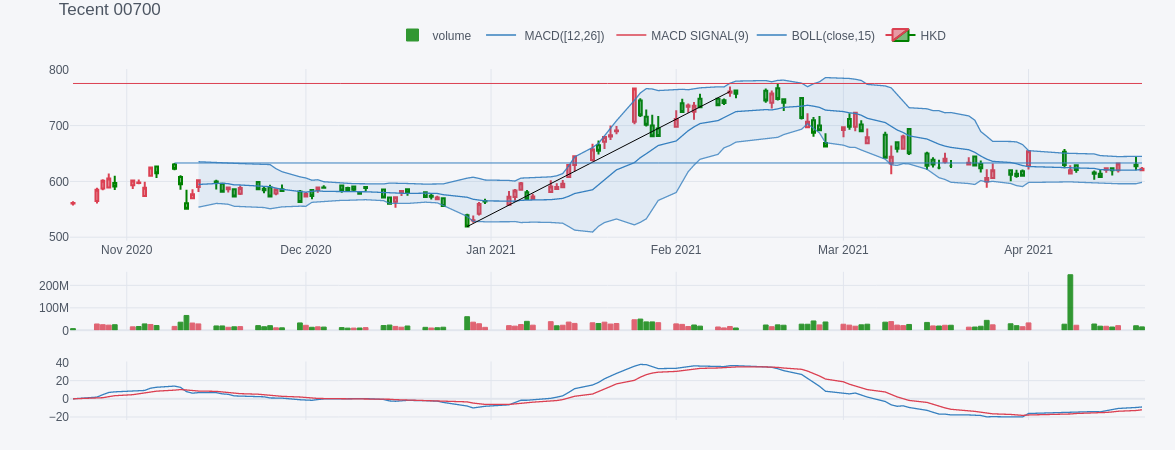

In [28]:
qf.add_macd()
qf.add_bollinger_bands(periods=15, boll_std=2)  
plyo.iplot(qf.iplot(asFigure=True, up_color='red',down_color='green'),
     image='png',
     filename='qf_02')

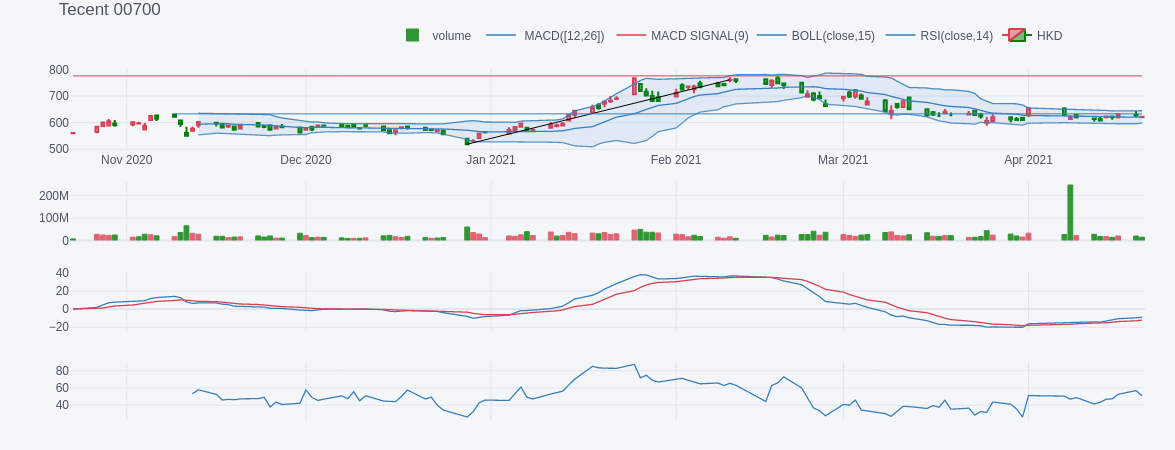

In [29]:
qf.add_rsi(periods=14, showbands=False)
plyo.iplot(
     qf.iplot(asFigure=True, up_color='red',down_color='green'),
     image='png',
     filename='qf_03'
)